## Linear Regression

#### We start with linear regression, a simple supervised learning model. Linear regression fits a straight line to data, mathematically:

#### y = b + m*x

#### where b is the intercept and m is the slope, x is a feature or an input, whereas y is label or an output. Our job is to find m and b such that the errors are minimized.

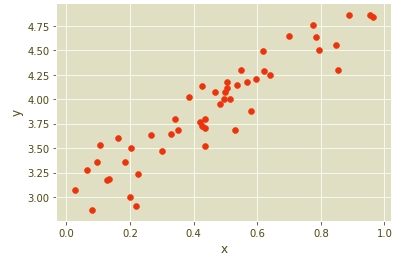
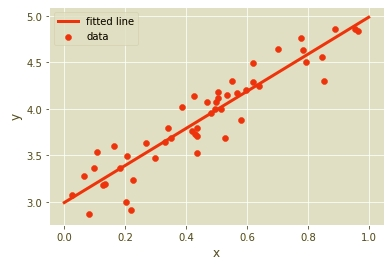

#### To visualize the concept, let’s start with five points (1.5, 2.8), (2, 5.3), (2.5, 5.5), (3, 7), (3.5, 8.8):

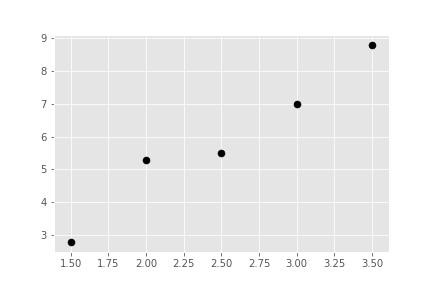

#### We would like to fit a line through these data points, however even by eyeballing it, there doesn’t exist a line going through all five points, so we will do the best we could. What does this mean?

#### Of the three lines shown below, which one do you think fits the data the best? The green line is y =10 + (-2)*X, the blue line is y = 5.5 + 0*X, and the red line is y = 1 + 2*X:

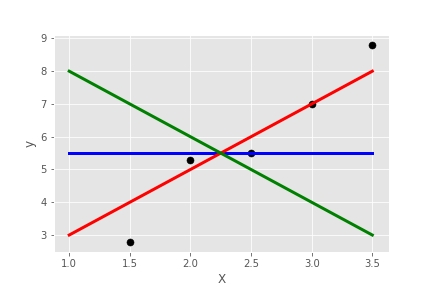

#### Red line! Why? Because it best captures the linear relationship between X and y, and it is closest to the points. Mathematically, the distance between the fitted line and data points are calculated by residuals, indicated by the dashed black vertical line in the plot below:

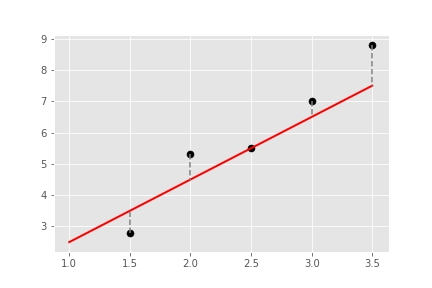

#### So linear regression essentially is finding the line where it minimizes the sum of the squared residuals that we will discuss later.

#### Linear regression models are popular because they can perform a fit quickly, and are easily interpreted. Predicting a continuous value with linear regression is a good starting point.

## Boston Housing Dataset

#### The Boston housing dataset is our sample dataset that provides median values of homes in different areas around Boston. Along with the median home values in 1000 (MEDV), crime (CRIM), nitric oxides concentration (NOX), the average number of rooms (RM), percentage of lower status of the population (LSTAT), and other features are provided. Our objective is to predict median home price (MEDV), the target in this scenario, using some features provided.

#### The data is built in scikit-learn and we will use load_boston to load the object that contains all the information.

In [1]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

#### For easier manipulations later, we create a pandas DataFrame from the numpy ndarrays stored in boston_dataset.data as follows:

In [2]:
import pandas as pd
boston = pd.DataFrame(boston_dataset.data, 
columns=boston_dataset.feature_names)

#### As the name suggests, boston_dataset.feature_names contain names for all features. We then add the target into the DataFrame:

In [4]:
boston['MEDV'] = boston_dataset.target

#### Let’s inspect the data set in 'boston' DataFrame.

In [9]:
boston.shape[0]

506

In [10]:
boston.shape[1]

14

In [11]:
boston.shape

(506, 14)

#### It is useful for quickly testing if the DataFrame has the right type of data in it. To see the first few rows of a DataFrame, use .head(n), where you can specify n for the number of rows to be selected. If n is omitted, by default, it selects the first 5 rows.

#### To check the first 5 rows, use boston.head(), for the ease of display, we select columns CHAS, RM, AGE, RAD, and MEDV:

In [12]:
boston[['CHAS','RM','AGE','RAD','MEDV']].head()

,CHAS,RM,AGE,RAD,MEDV
0,0.0,6.575,65.2,1.0,24.0
1,0.0,6.421,78.9,2.0,21.6
2,0.0,7.185,61.1,2.0,34.7
3,0.0,6.998,45.8,3.0,33.4
4,0.0,7.147,54.2,3.0,36.2


#### After scanning the values, CHAS and RAD appear to be integers, not floats. According to the description of the data, CHAS identifies if the property’s tract bounds a river (=1) or not (=0); and RAD is an accessibility index to radial highways.

#### Often datasets are loaded from other file formats (e.g., csv, text), it is a good practice to check the first and last few rows of the dataframe and make sure the data is in a consistent format using head and tail, respectively.

In [13]:
boston.head(n=5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Recall that It’s not practical to print out an entire dataset with a large sample size. Instead, we want to summarize and characterize sample data using only a few values. To check the summary statistics of the dataset (round to the second decimal place for better display):

In [14]:
boston.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


#### Binary CHAS has a mean of 0.07, and its 3rd quartile is 0. This indicates that most of the values in CHAS are 0. The average number of rooms per dwelling ranges from 3.56 to 8.78, with a mean of 6.28 and a median of 6.21. The distribution of RM appears symmetric.

#### If the DataFrame contains more than just numeric values, by default, describe() outputs the descriptive statistics for the numeric columns. To show the summary statistics of all column, specify include = 'all' in the method.

In [18]:
boston['AGE'].describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

### Visualization


#### Summary statistics provides a general idea of each feature and the target, but visualization reveals the information more clearly. It’s a good practice to visualize and inspect the distribution column by column. Here we look at CHAS and RM to verify our conclusions from the last part.


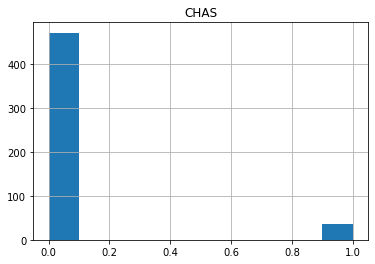

In [21]:
import matplotlib.pyplot as plt
boston.hist(column='CHAS')
plt.show()

#### CHAS only takes on two values, 0 and 1, with most of them 0’s. It is consistent with what the describe() reports; specifically, the third quartile of CHAS is 0.

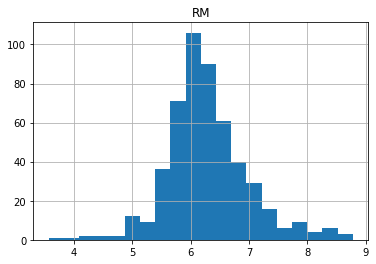

In [22]:
boston.hist(column='RM', bins=20)
plt.show()

#### The distribution of RM appears normal and symmetric. The symmetry aligns with what we observed from the output of describe(), as the mean of RM 6.28 is close to its median 6.21.

#### Informative data visualization not only reveals insights, but they are invaluable to communicate findings to stakeholders.

### Correlation Matrix

#### To understand the relationship among features (columns), a correlation matrix is very useful in the exploratory data analysis. Correlation measures linear relationships between variables. We can construct a correlation matrix to show correlation coefficients between variables. It is symmetric where each element is a correlation coefficient ranging from -1 and 1. A value near 1 (resp. -1) indicates a strong positive (resp. negative) correlation between variables. We can create a correlation matrix using the "corr" function:

In [26]:
corr_matrix = boston.corr().round(2)
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


#### The last row or column is used to identify features that are most correlated with the target MEDV (median value of owner-occupied homes in S1000’s). LSTAT (percentage of lower status of the population) is most negatively correlated with the target (-0.74) which means that as the percentage of lower status drops, the median house values increases; while RM (the average number of rooms per dwelling) is most positively correlated with MEDV (0.70) which means that the house value increases as the number of rooms increases.

#### Understanding data using exploratory data analysis is an essential step before building a model. From sample size and distribution to the correlations between features and target, we gather more understanding at each step aiding in feature and algorithm selection.

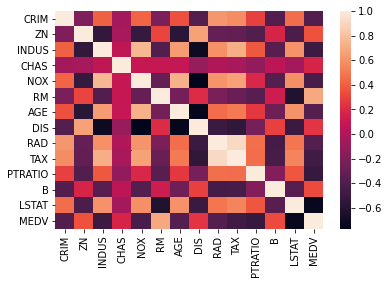

In [28]:
import seaborn as sns
sns.heatmap(boston.corr());

### Data Preparation - Feature Selection

#### In the previous lesson, we noticed that RM and MEDV are positively correlated. Recall that scatter plot is a useful tool to display the relationship between two features; let’s take a look at the scatter plot:

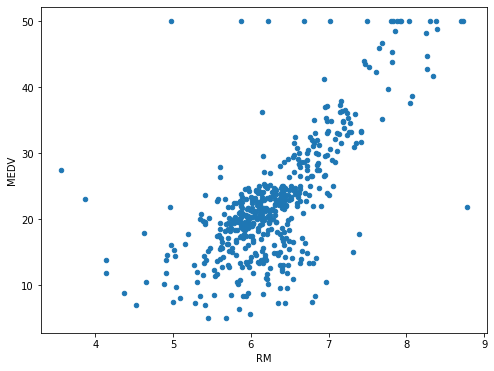

In [31]:
boston.plot(kind='scatter',
 x='RM',
 y='MEDV',
 figsize=(8,6));

#### We specify the type of the plot by passing a string ‘scatter’ to the argument kind, identify the labels for x and y respectively, and set the size of the figure via a tuple (width, height) in inches.

#### The price increases as the value of RM increases linearly. There are a few outliers that appear to be outside of the overall pattern. For example, one point on the center right corresponds to a house with almost 9 rooms but a median value slightly above S20K. Homes with similar values usually have around 6 rooms. In addition, the data seems to have a ceiling; that is the maximum median value is capped at 50.

#### On the other hand prices tend to decrease with an increase in LSTAT; and the trend isn’t as linear.

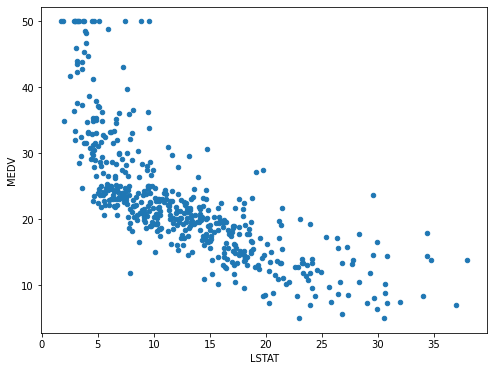

In [32]:
boston.plot(kind='scatter',
 x='LSTAT',
 y='MEDV',
 figsize=(8,6));

#### Of the two features, RM appears a better choice for predicting MEDV. Thus we start with a univariate linear regression: MEDV = b + m * RM.

#### In scikit-learn, models require a two-dimensional feature matrix (X, 2darray or a pandas DataFrame) and a one-dimensional target array (Y).

#### Here we define the feature matrix as the column RM in boston and assign it to X. Note the double brackets around 'RM' in the code below, it is to ensure the result remains a DataFrame, a 2-dimensional data structure:

In [34]:
X = boston[['RM']]
print(X.shape) #(506,1)

(506, 1)


#### Similarly, we define our target to be the column MEDV in boston and assign it in a variable called Y:

In [37]:
Y=boston['MEDV']
print(Y.shape) #(506,)

(506,)


#### Recall that the single bracket outputs a Pandas Series, while a double bracket outputs a Pandas DataFrame, and the model expects the feature matrix X to be a 2darray.

#### Feature selection is used for several reasons, including simplification of models to make them easier to interpret, shorter training time, reducing overfitting, etc.

### Instantiating the Model

#### In scikit-learn, every class of model is represented by a class in python. A class of model is not the same as an instance of a model. Recall that instance is an individual object of a certain class. Thus, we first import the linear regression class, then instantiate the model, that is to create an instance of the class LinearRegression:

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#### Now the model is instantiated, but not yet applied to the data.
#### Scikit-learn makes the distinction between choice of model and application of model to data very clear.

### Train-Test Split

#### Next we split the data into training and testing sets. Why? To assess the performance of the model on newly unseen data. We train the model using a training set, and save the testing set for evaluation.

#### A good rule of thumb is to split data 70-30, that is, 70% of data is used for training and 30% for testing. We use train_test_split function inside scikit-learn’s module model_selection to split the data into two random subsets. Set random_state so that the results are reproducible.

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1)

#### We check the dimensions to ensure the same number of rows.

In [45]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(354, 1)
(354,)
(152, 1)
(152,)


#### To get an objective assessment on model’s predictive power, it’s important to keep the testing data unseen to the built model.

### Fitting the Model

#### In short, fitting is equal to training. It fits the model to the training data and finds the coefficients specified in the linear regression model, i.e., intercept and slope. After it is trained, the model can be used to make predictions.

#### Now let us apply the model to data. Remember, we save the testing data to report the model performance and only use the training set to build the model. The syntax is:

In [46]:
model.fit(X_train, Y_train)

LinearRegression()

#### The fit() command triggers the computations and the results are stored in the model object.

#### Fitting is how well the machine learning model measures against the data upon which it was trained.

### Parameter Estimates

#### The linear regression model has been fitted, what it means is that both parameters, the intercept and the slope, have been learned. What are they? In Scikit-learn, by convention all model parameters have trailing underscores, for example to access the estimated intercept from the model, rounded to the 2nd decimal place for better display:

In [47]:
model.intercept_.round(2)

-30.57

#### Similarly, the estimated coefficient of feature RM is:

In [48]:
model.coef_.round(2)

array([8.46])

#### The two parameters represent the intercept and slope of the line fit to the data. Our fitted model is MEDV = -30.57 + 8.46 * RM. For one unit increase in RM, the median home price would go up by S8460.

### The full code to fit the model is:


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = boston[['RM']]
Y = boston['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1)
model = LinearRegression()
model.fit(X_train, Y_train)
model.intercept_.round(2)
model.coef_.round(2)

array([8.46])

#### You did it! You just built the first linear regression model in scikit-learn: from import the class to instantiate the model, to fit the model to the data, and done!

### Prediction

#### Once the model is trained, supervised machine learning will evaluate test data based on previous predictions for the unseen data. We can make a prediction using the predict() method.

#### When the average number of rooms per dwelling is 6.5, the model predicts a home value of S24,426.06.

In [51]:
import numpy as np
new_RM = np.array([6.5]).reshape(-1,1) # certifique-se que é 2D
model.predict(new_RM) 

array([24.42606323])

#### Note that the input has to be 2-dimensional, either a 2darray or DataFrame will work in this case.

#### This value is the same as we plug in the line b + m*x where b is the estimated intercept from the model, and m is the estimated slope.

#### model.intercept_+model.coef_*6.5

#### In addition, we can feed the testing set and get predictions for all homes. 

In [54]:
y_test_predicted = model.predict(X_test)
y_test_predicted.shape
type(y_test_predicted)

numpy.ndarray

#### The output is a 1darray, same shape as the Y_test.

In [55]:
Y_test.shape

(152,)

#### The predict() method estimates the median home value by computing model.intercept_ + model.coef_*RM.

### Residuals

#### How good is our prediction? We can examine model performance by visually comparing the fitted line and the true observations in the test set.

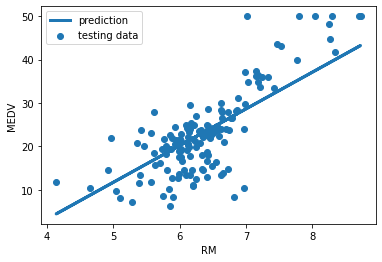

In [56]:
plt.scatter(X_test, Y_test, label='testing data')
plt.plot(X_test, y_test_predicted, label='prediction', linewidth=3)
plt.xlabel('RM'); plt.ylabel('MEDV')
plt.legend(loc='upper left')
plt.show()

#### Some points sit on the line, but some are away from it. We can measure the distance between a point to the line along the vertical line, and this distance is referred to as residual or error. A residual is the difference between the observed value of the target and the predicted value. The closer the residual is to 0, the better job our model is doing.

#### We can calculate a residual and represent it in a scatter plot.

## Resíduo

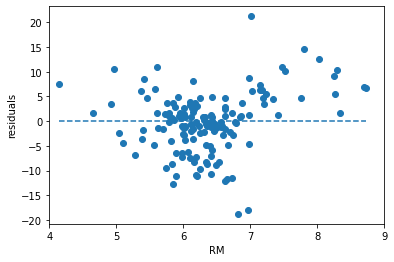

In [58]:
residuals = Y_test - y_test_predicted

#plot the residuals
plt.scatter(X_test, residuals)
#plot a horizontal line at y=0
plt.hlines(y=0, xmin=X_test.min(), xmax=X_test.max(), linestyle='--')
# set xlim
plt.xlim((4,9))
plt.xlabel('RM'); plt.ylabel('residuals')
plt.show()

#### Residuals are scattered around the horizontal line, y = 0, with no particular pattern. This seemingly random distribution is a sign that the model is working. Ideally the residuals should be symmetrically and randomly spaced around the horizontal axis; if the residual plot shows some pattern, linear or nonlinear, that’s an indication that our model has room for improvement.

#### Residual plots can reveal bias from the model and statistical measures indicate goodness-of-fit.

### Mean Squared Error

#### Previously, we learned that when each residual is near 0 it suggests a good fit. For example, the first five residuals in our model:

In [59]:
residuals[:5]

307    0.821016
343   -2.184437
47    -3.849350
67     2.836736
362    6.002659
Name: MEDV, dtype: float64

#### Those are individual data points, how about the model performance for all data points? We need a way to aggregate the residuals and just report one number as the metric. It is natural to take the average of all residuals:

In [60]:
residuals.mean() ## não é muito preciso

-0.23645087766388564

#### -0.24 is quite close to 0, but there’s a problem: residuals can be positive or negative so taking the average cancels them out. That’s not an accurate metric. To solve this, we take a square of each residual, then take the mean of squares. This is called mean squared error (MSE):

In [61]:
(residuals ** 2).mean() # erro médio quadrático (MSE)

36.5172147308386

#### We can also use the mean_squared_error() method under scikit-learn metrics module to output the same result:

In [62]:
from sklearn.metrics import mean_squared_error 
mean_squared_error (Y_test, y_test_predicted)

36.517214730838624

#### In general, the smaller the MSE, the better, yet there is no absolute good or bad threshold. We can define it based on the dependent variable, i.e., MEDV in the test set. Y_test ranges from 6.3 to 50 with a variance 92.26. Compared to the total variance, a MSE of 36.52 is not bad.

#### To make the scale of errors to be the same as the scale of targets, root mean squared error (RMSE) is often used. It is the square root of MSE.

### R-squared

#### Another common metric to evaluate the model performance is called R-squared; one can calculate it via model.score():

In [63]:
model.score(X_test, Y_test)

0.6015774471545623

#### It is the proportion of total variation explained by the model. Here, around 60% of variability in the testing data is explained by our model.

#### The total variation is calculated as the sum of squares of the difference between the response and the mean of response, in the example of testing data:


In [67]:
((Y_test-Y_test.mean())**2).sum()

13931.482039473683

#### Whereas the variation that the model fails to capture is computed as the sum of squares of residuals:

In [68]:
(residuals**2).sum()

5550.6166390874705

#### Then the proportion of total variation from the data is:

In [69]:
1-5550.6166390874705/13931.482039473683

0.6015774471545623

#### A perfect model explains all the variation in the data. Note R-squared is between 0 and 100%: 0% indicates that the model explains none of the variability of the response data around its mean while 100% indicates that the model explains all of it.
#### Evaluating R-squared values in conjunction with residual plots quantifies model performance.

### Overview

#### Recall LSTAT (% lower status in population) is most negatively correlated to the home price. We can add the feature and build a multivariate linear regression model where the home price depends on both RM and LSTAT linearly:

#### MEDV = b0 + b1 * RM + b2 * LSTAT
#### To find intercept b0, and coefficients b1 and b2, all steps are the same except for the data preparation part, we are now dealing with two features:


In [71]:
## preparação dos dados
X2 = boston[['RM', 'LSTAT']]
Y = boston['MEDV']
## divisão de teste de treino
## mesmo random_state para garantir as mesmas divisões
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.3, random_state=1)
model2 = LinearRegression()
model2.fit(X2_train, Y_train)

LinearRegression()

#### We can access the parameters after model2 is fitted

In [76]:
model2.intercept_
model2.coef_

array([ 4.12674118, -0.67762654])

#### Note the coefficients are stored in a 1darray of shape (2,). The second model then is
#### MEDV = 5.32 + 4.13 * RM + (-0.68) * LSTAT.
#### Allowing for predictions:

In [77]:
y_test_predicted2 = model2.predict(X2_test)

#### The extension from univariate to multivariate linear regression is straightforward in scikit-learn. The model instantiation, fitting, and predictions are identical, the only difference being the data preparation.

### Comparing Models

#### Which model is better? An easy metric for linear regression is the mean squared error (MSE) on the testing data. Better models have lower MSEs. Recall the MSE of the first model on testing data is:

In [78]:
mean_squared_error(Y_test, y_test_predicted).round(2)

36.52

#### The MSE of the second model is:

In [79]:
mean_squared_error(Y_test, y_test_predicted2).round(2)

28.93

#### The second model has a lower MSE, specifically a 21% reduction (36.52-28.93)/36.52 = 21%); thus it does a better job predicting the median home values than the univariate model.

#### In general, the more features the model includes the lower the MSE would be. Yet be careful about including too many features. Some features could be random noise, thus hurt the interpretability of the model.

In [83]:
(36.52-28.93)/36.52  ## redução 21%

0.2078313253012049